In [1]:
%%capture

# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

# Important header information
naluhelperdir = '../utilities'
# Import libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1, naluhelperdir)

%matplotlib inline

In [2]:
rundict = [
    # Dir,                prefix,     lcolor
    ['NaluWind_newBC' ,  'NaluWind',  'b'],
    ['amrwind_run01' ,   'amrwind',   'r'],
    ]

In [3]:
# DanAero Data
# See /ascldap/users/lcheung/GPFS1/2020/IEATask29/Field measurements Tjaereborg/Calibrated data/InflowLoadsAerodynamicsMeasurements_35Hz/PythonAnalysis/avgcolsWS.dat
# Run 16-07-2009/Tjaereborg_20090716_1250_000035.tim
DanAeroZ  = [17,        28.5,      41,        57,        77,        90]
DanAeroWS = [5.884,     5.973,     5.931,     6.128,     6.028,     6.088]

# Hub-height locations
plotheights=[57.19]

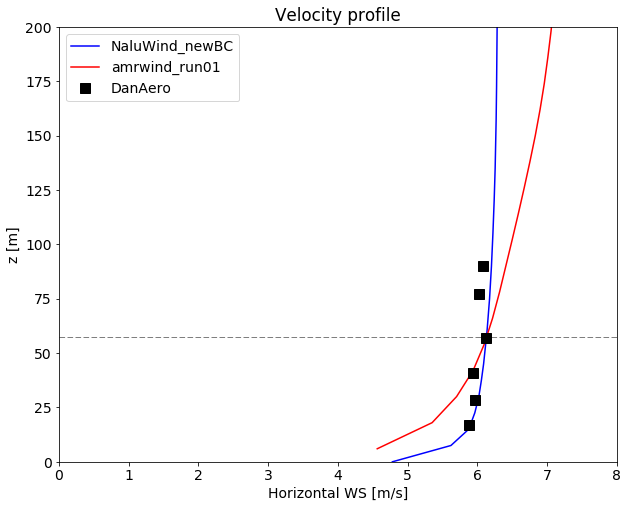

In [4]:
# Plot velocity
plt.figure(figsize=(10,8));
plt.rc('font', size=14)

for run in rundict:
    filename = run[0]+'/'+run[1]+'_velocity.dat'
    vdat     = np.loadtxt(filename)
    Uhoriz   = np.sqrt(vdat[:,1]**2 + vdat[:,2]**2)
    plt.plot(Uhoriz, vdat[:,0], color=run[2], label=run[0])
    
# Plot hub-heights
for hh in plotheights: plt.hlines(hh, 0, 30, linestyles='dashed', linewidth=0.5)

# Plot DanAero Data
plt.plot(DanAeroWS, DanAeroZ, 's', color='k',markersize=10, label='DanAero')
    
plt.ylim([0,200])
plt.xlim([0,8])
plt.ylabel('z [m]')
plt.xlabel('Horizontal WS [m/s]')
plt.legend()
plt.title('Velocity profile')

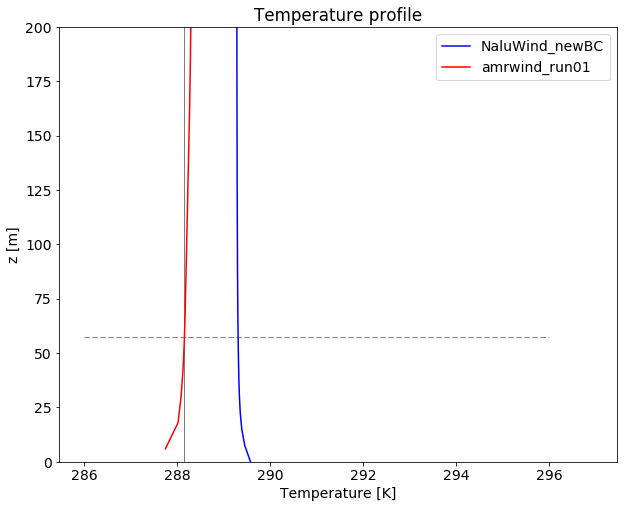

In [5]:
# Plot temperature
plt.figure(figsize=(10,8));
plt.rc('font', size=14)

for run in rundict:
    filename = run[0]+'/'+run[1]+'_temperature.dat'
    Tdat     = np.loadtxt(filename)
    plt.plot(Tdat[:,1], Tdat[:,0], color=run[2], label=run[0])

# Plot hub-heights
for hh in plotheights: plt.hlines(hh, 286, 296, linestyles='dashed', linewidth=0.5)

plt.vlines(288.15, 0,1000, linewidth=0.5)
plt.ylim([0,200])
plt.xlabel('Temperature [K]')
plt.ylabel('z [m]')
plt.legend()
plt.title('Temperature profile')

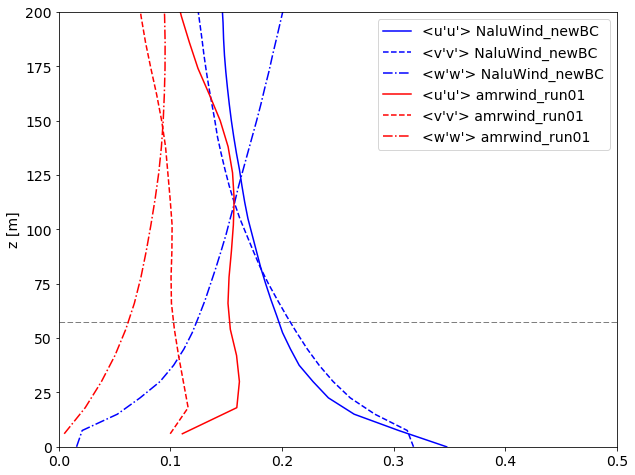

In [6]:
# Plot Reynolds stresses
plt.figure(figsize=(10,8));
plt.rc('font', size=14)

for run in rundict:
    filename = run[0]+'/'+run[1]+'_reynoldsstresses.dat'
    REdat     = np.loadtxt(filename)
    plt.plot(REdat[:,1], REdat[:,0], color=run[2], linestyle='-',  label="<u\'u\'> "+run[0])
    plt.plot(REdat[:,4], REdat[:,0], color=run[2], linestyle='--', label="<v\'v\'> "+run[0])
    plt.plot(REdat[:,6], REdat[:,0], color=run[2], linestyle='-.', label="<w\'w\'> "+run[0])
    
# Plot hub-heights
for hh in plotheights: plt.hlines(hh, 0, 30, linestyles='dashed', linewidth=0.5)

# Plot DanAero Data
#plt.plot(DanAeroWS, DanAeroZ, 's', color='k',markersize=10, label='DanAero')
    
plt.ylim([0,200])
plt.xlim([0,0.5])
plt.ylabel('z [m]')
#plt.xlabel('Horizontal WS [m/s]')
plt.legend()